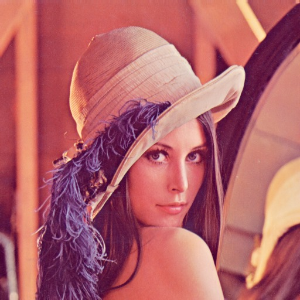

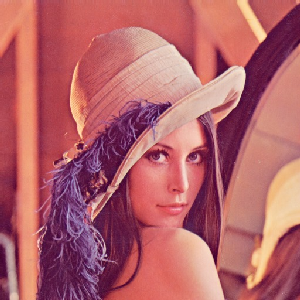

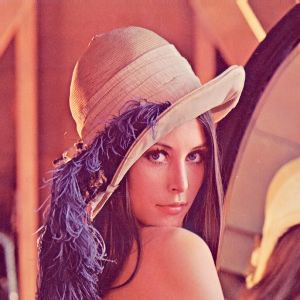

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread('/content/WhatsApp Image 2025-01-14 at 11.16.12.jpeg')

# 1.1.1 Linear Interpolation
resized_linear = cv2.resize(image, (300, 300), interpolation=cv2.INTER_LINEAR)

# 1.1.2 Nearest Neighbors Interpolation
resized_nearest = cv2.resize(image, (300, 300), interpolation=cv2.INTER_NEAREST)

# 1.1.3 Polynomial Interpolation (Cubic interpolation)
resized_cubic = cv2.resize(image, (300, 300), interpolation=cv2.INTER_CUBIC)

# Display the resized images
cv2_imshow(resized_linear)
cv2_imshow(resized_nearest)
cv2_imshow(resized_cubic)


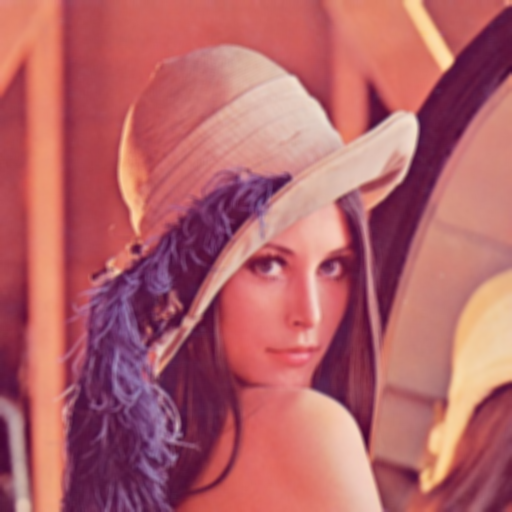

In [ ]:
# Apply box blur using a kernel size of (5, 5)
blurred_image_box = cv2.blur(image, (5, 5))

# Display the blurred image
cv2_imshow(blurred_image_box)

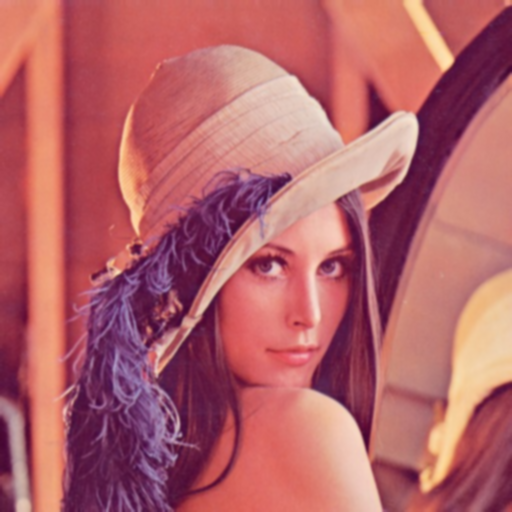

In [ ]:
# 1.2.2 Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Display the blurred image
cv2_imshow(gaussian_blur)

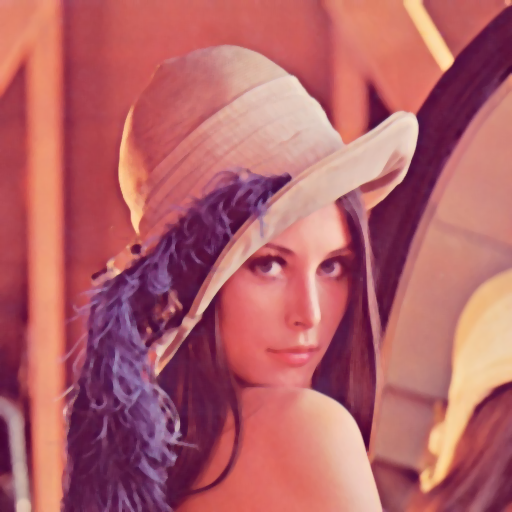

In [ ]:
# 1.2.3 Adaptive Blurring (Median Blurring)
adaptive_blur = cv2.medianBlur(image, 5)

# Display the blurred image
cv2_imshow(adaptive_blur)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split into train and test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate using K-Fold Cross Validation
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)
print("Naive Bayes Cross-Validation Accuracy: ", nb_scores.mean())

Naive Bayes Cross-Validation Accuracy:  0.8295489740611692


In [ ]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Evaluate using K-Fold Cross Validation
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM Cross-Validation Accuracy: ", svm_scores.mean())

SVM Cross-Validation Accuracy:  0.9707680023228804


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Make predictions with Naive Bayes
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# Accuracy, Precision, Recall, and F-Measure
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f_measure = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print("Confusion Matrix:\n", conf_matrix)
print(f"AUC: {roc_auc}")

Accuracy: 0.8472222222222222
Precision: 0.8750603074057791
Recall: 0.8472222222222222
F-Measure: 0.8489770318561582
Confusion Matrix:
 [[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]
AUC: 0.9905335628227194


SVM Cross-Validation Accuracy:  0.9707680023228804


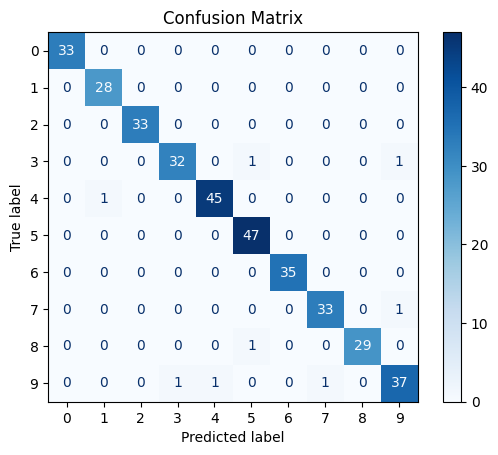

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined
# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Evaluate using K-Fold Cross Validation
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM Cross-Validation Accuracy: ", svm_scores.mean())

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()